In [4]:
%pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io

In [8]:
# Load satellite image
image = io.imread('/Users/sukanya/Documents/Aircraft/FGVC/fgvc-aircraft-2013b/fgvc-aircraft-2013b/data/train/images/0056331.jpg')

In [9]:
# Reshape the image to a 2D array of pixels
h, w, d = image.shape
image_2d = image.reshape(h * w, d)

In [10]:
# Perform Gaussian Mixture Model clustering
num_components = 5  # You can adjust this value based on your requirements
gmm = GaussianMixture(n_components=num_components, random_state=0)
gmm.fit(image_2d)
cluster_labels = gmm.predict(image_2d)

In [11]:
# Reshape the cluster labels to the original image shape
segmented_image = cluster_labels.reshape(h, w)

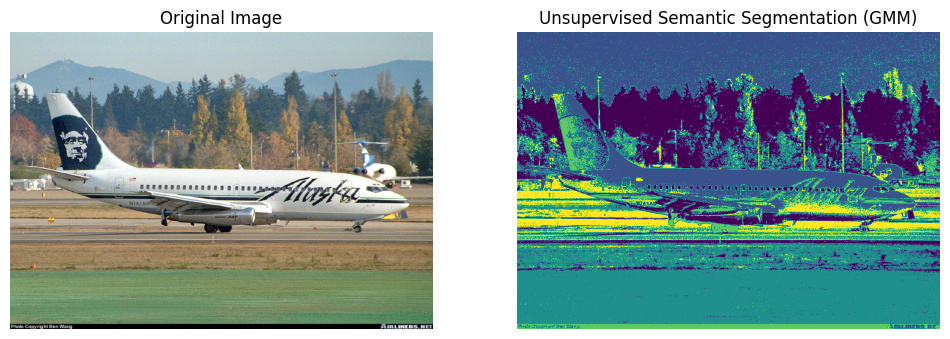

In [14]:
# Display the original and segmented images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Unsupervised Semantic Segmentation (GMM)')
plt.axis('off')

plt.show()